In [14]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()
bk = Aer.get_backend("qasm_simulator") # Use QASM Simulator for backend

## Answer to task 1
Usage: <br>
    ```final_quantum_circuit = qram(vector=[vector]).main()```

In [15]:
class qram(object):
    
    """Returns a quantum circuit for the targets solutions
    
    Note:
        This is a 2 qubit implementation, it won't work on 2 ^ N qubits

        Target Solutions:
            They are the indices of binary numbers where two 
            adjacent bits will always have different values.

    Args:
        vector (list[int]): Vector of Numbers

    Attributes:
        main: Returns quantum circuit for superposition of targets indices 
        (Private) __oracle: Stores the Quantum Circuit in self.circ
        
    Raises:
      AttributeError: If length of the vector is greater than 4 or less then 1.
      TypeError: If the type of vector is not list or if type of elements is not integer or float.
      
    """
    
    
    def __init__(self, vector: list):
        """
        Initializes:
            self.vector list[int]: Vector Of Numbers
            self.binary_vector list[str]: Binary instance of self.vector
            self.indices list[int]: Indices of the targets
            self.zfill int: Length of the longest binary number
            self.circ QuantumCircuit: The Final Quantum Circuit
        """
        
        # error handeling
        
        if len(vector) > 4:
            raise AttributeError('Length of vector should be less than 4 and greater than 1')
        if type(vector) != list:
            raise TypeError('The type of vector should be list')
        for i in vector:
            try:
                vector[vector.index(i)] = int(i)
            except TypeError:
                raise TypeError('The element of vector should be integer')
                
        self.vector = vector
        self.binary_vector = []
        self.indices = []      
        self.zfill: int = None 
        self.circ = None
        
    
    def main(self) -> 'QuantumCiurcuit':
        """
        Return:
            Quantum circuit: if target indices exist
            "No targets found": if no target indices found
        """
        
        temp = []
        
        # Find the zfill
        
        for num in self.vector:
            temp.append(str(bin(num)).replace("0b", ""))
        self.zfill = len(max(temp, key=len))
        
        # convert to binary
        
        for num in self.vector:
            binary = bin(num)[2:].zfill(self.zfill)
            self.binary_vector.append(binary)
        
        
        # find target indices
        
        if self.zfill == 4:
            for num in self.binary_vector:
                if num[0] == num[2] and num[1] == num[3]:
                        self.indices.append(self.binary_vector.index(num))
        elif self.zfill == 3:
            for num in self.binary_vector:
                if num[0] == num[2] and num[0] != num[1]:
                    self.indices.append(self.binary_vector.index(num))
        elif self.zfill == 2:
            for num in self.binary_vector:
                if num[0] != num[1]:
                    self.indices.append(self.binary_vector.index(num))
        elif self.zfill == 1:
            self.indices.append(0)
        
        if len(self.indices) == 0:
            print("No target indices found")
            return None
            
        self.__oracle()
        return self.circ
    
    def __oracle(self) -> None:
        """
        Stores the Quantum Circuit in self.circ
        """
        
        circ = QuantumCircuit(2, 2) # inittialize 2 qubit quantum circuit
        indices = self.indices
        
        # Add the required gates according for the indices
        
        if len(indices) == 4:
            circ.h(0)
            circ.h(1)
            
        elif indices == [0]:
            pass
        
        elif indices == [0, 1] or indices == [1, 0]:
            circ.h(0)

        elif indices == [0, 2] or indices == [2, 0]:
            circ.h(1)

        elif indices == [0, 3] or indices == [3, 0]:
            circ.h(0)
            circ.cx(0, 1)

        elif indices == [1, 2] or indices == [2, 1]:
            circ.h(1)
            circ.cx(1, 0)
            circ.x(0)

        elif indices == [1, 3] or indices == [3, 1]:
            circ.x(0)
            circ.h(1)


        elif indices == [2, 3] or indices == [3, 2]:
            circ.h(0)
            circ.x(1)
        self.circ = circ
        
        return

### Test 1
`vector = [1,5,7,10]`

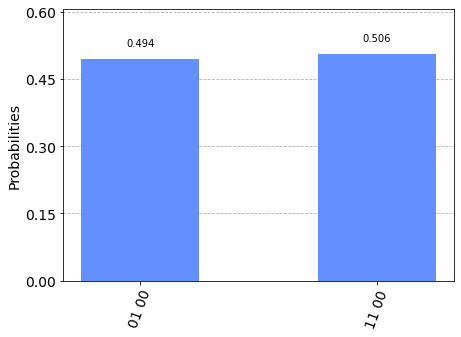

In [16]:
test1 = qram(vector=[1,5,7,10]).main()

test1.measure_all() # measure all the qubits
plot_histogram(execute(test1, bk, shots=8000).result().get_counts(test1)) # get result and plot the graph

**The Histogram is right indexed!**

### Test 2
`vector = [1,5,4,2]`

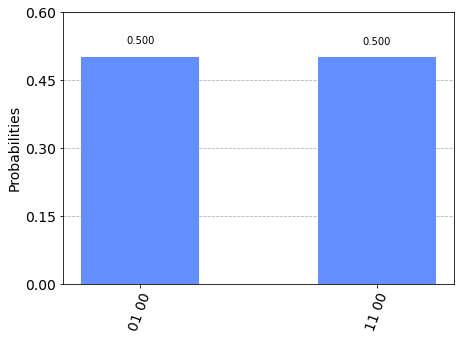

In [17]:
test2 = qram(vector=[1,5,4,2]).main()

test2.measure_all() # measure all the qubits
plot_histogram(execute(test2, bk, shots=8000).result().get_counts(test2)) # get result and plot the graph
# the histogram is right indexed!

**The Histogram is right indexed!**